In [1]:
import os
import sys
import time
import torch
import torch.nn as nn
import torchvision
import numpy as np
from glob import glob
from tqdm.autonotebook import tqdm
from dataloader.videodataset import VideoDataset
from torch.utils.data import DataLoader
from spatial_transforms import Compose
from spatial_transforms import Normalize
from spatial_transforms import Scale
from spatial_transforms import CenterCrop
from spatial_transforms import RandomHorizontalFlip
from spatial_transforms import RandomAffine
from spatial_transforms import RandomRotation
from spatial_transforms import ColorJitter
from spatial_transforms import ToTensor 
from temporal_transforms import TemporalRandomChoice
from temporal_transforms import TemporalRandomCrop
from temporal_transforms import LoopPadding, MirrorPadding, MirrorLoopPadding

/usr/local/lib/python3.5/dist-packages/tqdm/autonotebook/__init__.py:18: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [2]:
VIDEO_DIR='./data/images' #/data/videos
CLIP_LEN = 16
CLIP_LEN_AUG = CLIP_LEN/2
BATCH_SIZE = 16
NUM_CLASSES=1
NUM_WORKERS=16

IMG_SIZE = 224
#MEAN=[110.63666788, 103.16065604, 96.29023126]
#STD=[38.7568578, 37.88248729, 40.02898126]
MEAN=[128, 128, 128]
STD=[128, 128, 128]

spatial_transform = {
    'train': Compose([Scale(IMG_SIZE),
                      CenterCrop(IMG_SIZE),
#                       RandomHorizontalFlip(),
#                       ColorJitter(brightness=0.1),
#                       RandomAffine(5),
#                       RandomRotation(2.5),
                      ToTensor(1), 
                      Normalize(MEAN, STD)]),
    'val': Compose([Scale(IMG_SIZE), 
                    CenterCrop(IMG_SIZE), 
                    ToTensor(1), 
                    Normalize(MEAN, STD)])}

temporal_transform = {'train':Compose([
                #TemporalRandomCrop(CLIP_LEN_AUG),
                TemporalRandomChoice([
                    LoopPadding(CLIP_LEN),
                    MirrorPadding(CLIP_LEN),
                    MirrorLoopPadding(CLIP_LEN)])]),
                     'val':LoopPadding(CLIP_LEN)}

In [3]:
dataset = {
    'train': VideoDataset(os.path.join(VIDEO_DIR, 'train'), 
                          frames_per_clip=CLIP_LEN,
                          temporal_transform=temporal_transform['train'],
                          spatial_transform=spatial_transform['train']
                         ),
    'val': VideoDataset(os.path.join(VIDEO_DIR, 'val'), 
                          frames_per_clip=CLIP_LEN,
                          temporal_transform=temporal_transform['val'],
                        spatial_transform=spatial_transform['val']
                       ),
    'test': VideoDataset(os.path.join(VIDEO_DIR, 'test'), 
                         frames_per_clip=CLIP_LEN,
                         temporal_transform=temporal_transform['val'],
                         spatial_transform=spatial_transform['val']
                        )}


  0%|          | 0/1 [00:00<?, ?it/s]

Number of ./data/images/train video clips: 805


  0%|          | 0/1 [00:00<?, ?it/s]

Number of ./data/images/val video clips: 520


100%|██████████| 1/1 [00:00<00:00,  7.05it/s]

Number of ./data/images/test video clips: 471


In [4]:
dataloaders = {
     'train': DataLoader(dataset['train'], batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS),
    'val': DataLoader(dataset['val'], batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS)
}

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  


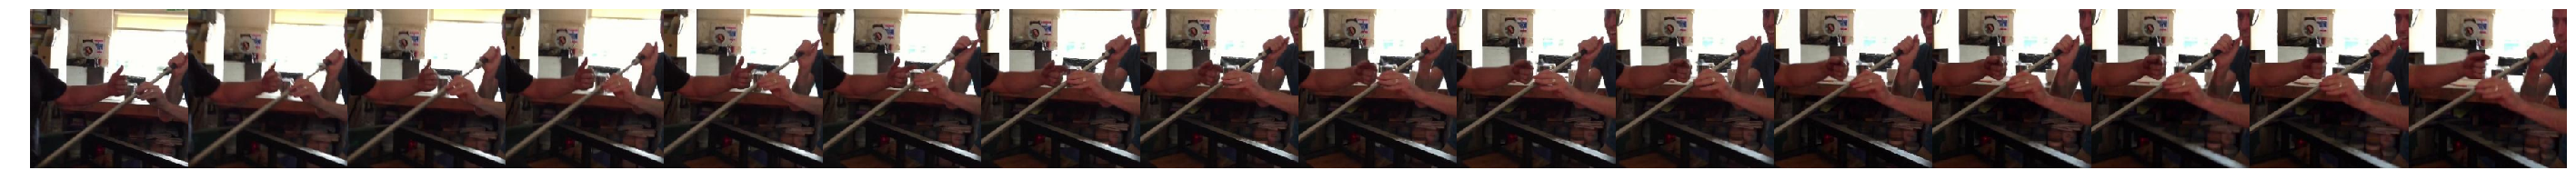

tensor([0])


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_dataset(item): # item: C x D x 244 x 244
    rgbs = item[0].transpose(0, 1)
    rgb = np.hstack((np.asarray(rgb).transpose(1, 2, 0)+1)/2 for rgb in rgbs)
    plt.figure(figsize=(50, 10))
    plt.imshow(rgb)
    plt.axis('off')
    plt.show()
    print(item[1])
    
i=0
phase='train'
show_dataset(dataset[phase][i])